# Dissimilarity based on wavelet decomposition
Wavelet decompotision is way to compress images. Each level of decomposition produces a series of coefficients. If computed for images to be compared, the dissimilarity of histogram of coefficients can be computed with the Jenson-Shanon divergence.

Wavelet decomposition is performed with the *PyWavelets* Python package [Lee et al., 2019]. Detailed documentation is avilable at: https://pywavelets.readthedocs.io/en/latest/ .

### Reference
Gregory R. Lee, Ralf Gommers, Filip Wasilewski, Kai Wohlfahrt, Aaron O’Leary (2019). PyWavelets: A Python package for wavelet analysis. Journal of Open Source Software, 4(36), 1237, https://doi.org/10.21105/joss.01237.

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import dist_wavelet

picklefilenamewvt = "./pickledata/testing-model-subset-wavelet.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432
n_levels=4
n_bins=20

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

# get dimensions
[nz,ny,nx,nbsamples]=mod_all.shape
nsamples = len(samples_ix)

## 2D illustration
Each plot illustrates the wavelet decomposition of two 2D voxets called img1 and img2 at successive levels. The first column shows the initial images. The second column displays the series of coefficients as 2D voxets. The last two columns show the histograms of each type of coefficients for both images.

20-Jul-2021 (16:41:43) - COMPUTING WAVELET BASED DIST GRV START
Level 0 img1 size: 200*200
Distance component: 0.0959987638616319


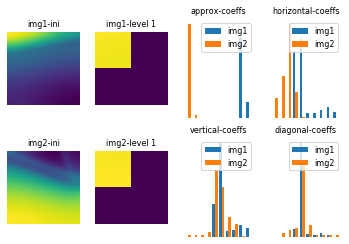

Level 1 img1 size: 100*100
Distance component: 0.09352812386365296


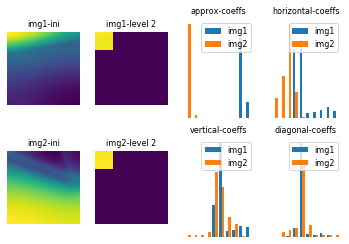

Level 2 img1 size: 50*50
Distance component: 0.09058210866088987


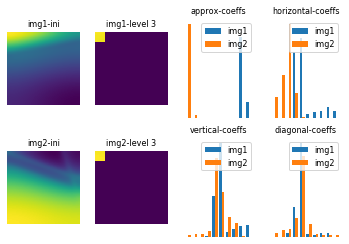

Level 3 img1 size: 25*25
Distance component: 0.09914747862390504


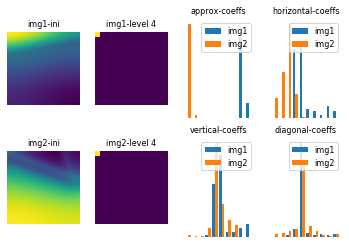

20-Jul-2021 (16:41:44) - COMPUTING WAVELET BASED DIST GRV END


In [2]:
# wavelet based distance on 2D gravity response

img1 = grv_all[:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = grv_all[:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST GRV START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST GRV END")


20-Jul-2021 (16:41:44) - COMPUTING WAVELET BASED DIST MAG START


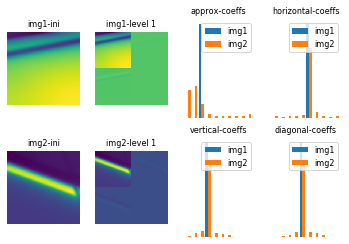

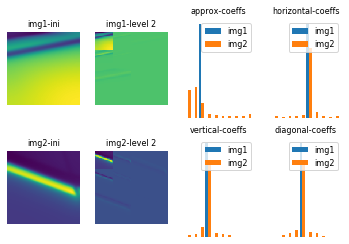

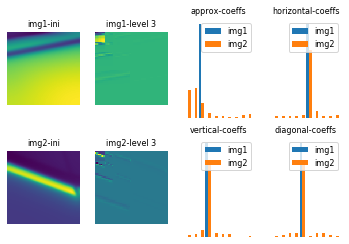

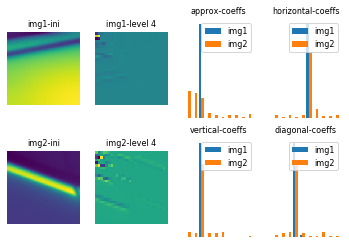

20-Jul-2021 (16:41:46) - COMPUTING WAVELET BASED DIST MAG END


In [3]:
# wavelet based distance on 2D magnetic response

img1 = mag_all[:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = mag_all[:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST MAG START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST MAG END")

## 3D illustration
Each plot illustrates the wavelet decomposition of two 3D voxets called img1 and img2 at successive levels. The first row displays 2D sections of the series of coefficients for the 3D voxets decomposed at a given level. The last row shows the histograms of each type of coefficients for both images.

20-Jul-2021 (16:41:46) - COMPUTING WAVELET BASED DIST DENSITY START
Level 0 img1 size: 200*200*200
Level 0 coeffs size: 100*100*100
Distance component: 0.014650715530180535


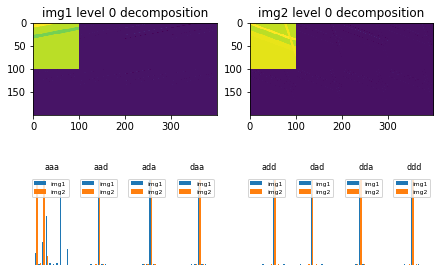

plotting coeffs size =100*100*100
Level 1 img1 size: 100*100*100
Level 1 coeffs size: 50*50*50
Distance component: 0.015847786364316916


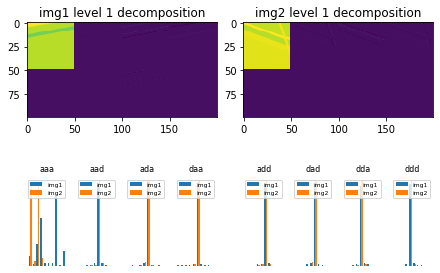

plotting coeffs size =50*50*50
Level 2 img1 size: 50*50*50
Level 2 coeffs size: 25*25*25
Distance component: 0.018575545117523278


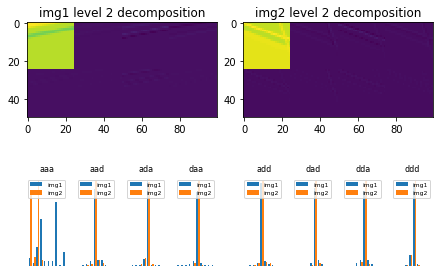

plotting coeffs size =25*25*25
Level 3 img1 size: 25*25*25
Level 3 coeffs size: 13*13*13
Distance component: 0.02521963924599576


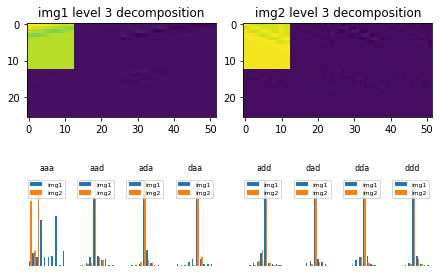

plotting coeffs size =13*13*13
20-Jul-2021 (16:41:54) - COMPUTING WAVELET BASED DIST DENSITY END


In [4]:
img1 = rho_all[:,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = rho_all[:,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2
# ADD section plot of 3D images
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST DENSITY START")
d = dist_wavelet(img1,img2,n_levels,n_bins,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST DENSITY END")

## Compute for all pairs of voxets<span style='color:red'>\*</span>
<span style='color:red'>**\*WARNING: IT COULD TAKE SOME TIME. PRECOMPUTED RESULTS ALREADY AVAILABLE IN THE PICKLE FOLDER** </span>

In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL START")

dist_wvt_mag = np.zeros((nsamples,nsamples))
dist_wvt_grv = np.zeros((nsamples,nsamples))
dist_wvt_mod = np.zeros((nsamples,nsamples))
dist_wvt_rho = np.zeros((nsamples,nsamples))
dist_wvt_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_wvt_mag[i,j] = dist_wavelet(mag_all[:,:,i],mag_all[:,:,j],n_levels,n_bins)
        dist_wvt_grv[i,j] = dist_wavelet(grv_all[:,:,i],grv_all[:,:,j],n_levels,n_bins)
        dist_wvt_mod[i,j] = dist_wavelet(mod_all[:,:,:,i],mod_all[:,:,:,j],n_levels,n_bins)
        dist_wvt_rho[i,j] = dist_wavelet(rho_all[:,:,:,i],rho_all[:,:,:,j],n_levels,n_bins)
        dist_wvt_sus[i,j] = dist_wavelet(sus_all[:,:,:,i],sus_all[:,:,:,j],n_levels,n_bins)
        dist_wvt_mag[j,i] = dist_wvt_mag[i,j]
        dist_wvt_grv[j,i] = dist_wvt_grv[i,j]
        dist_wvt_mod[j,i] = dist_wvt_mod[i,j]
        dist_wvt_rho[j,i] = dist_wvt_rho[i,j]
        dist_wvt_sus[j,i] = dist_wvt_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL END")


20-Jul-2021 (16:41:54) - COMPUTING WAVELET BASED DIST ALL START
20-Jul-2021 (16:41:54) - k = 1 - i = 1 j =  0
20-Jul-2021 (16:41:58) - k = 2 - i = 2 j =  0
20-Jul-2021 (16:42:02) - k = 3 - i = 2 j =  1
20-Jul-2021 (16:42:05) - k = 4 - i = 3 j =  0
20-Jul-2021 (16:42:08) - k = 5 - i = 3 j =  1
20-Jul-2021 (16:42:11) - k = 6 - i = 3 j =  2
20-Jul-2021 (16:42:15) - k = 7 - i = 4 j =  0
20-Jul-2021 (16:42:19) - k = 8 - i = 4 j =  1
20-Jul-2021 (16:42:23) - k = 9 - i = 4 j =  2
20-Jul-2021 (16:42:26) - k = 10 - i = 4 j =  3
20-Jul-2021 (16:42:30) - k = 11 - i = 5 j =  0
20-Jul-2021 (16:42:34) - k = 12 - i = 5 j =  1
20-Jul-2021 (16:42:37) - k = 13 - i = 5 j =  2
20-Jul-2021 (16:42:41) - k = 14 - i = 5 j =  3
20-Jul-2021 (16:42:44) - k = 15 - i = 5 j =  4
20-Jul-2021 (16:42:47) - k = 16 - i = 6 j =  0
20-Jul-2021 (16:42:51) - k = 17 - i = 6 j =  1
20-Jul-2021 (16:42:56) - k = 18 - i = 6 j =  2
20-Jul-2021 (16:43:00) - k = 19 - i = 6 j =  3
20-Jul-2021 (16:43:04) - k = 20 - i = 6 j =  4
20-Ju

## Multi Scale Dimensioning representation<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

20-Jul-2021 (16:44:30) - COMPUTING 2D MDS REPRESENTATION START


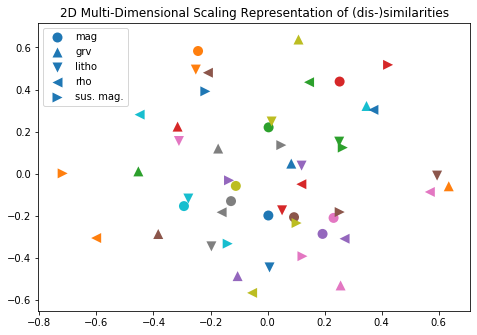

20-Jul-2021 (16:44:33) - COMPUTING 2D MDS REPRESENTATION END


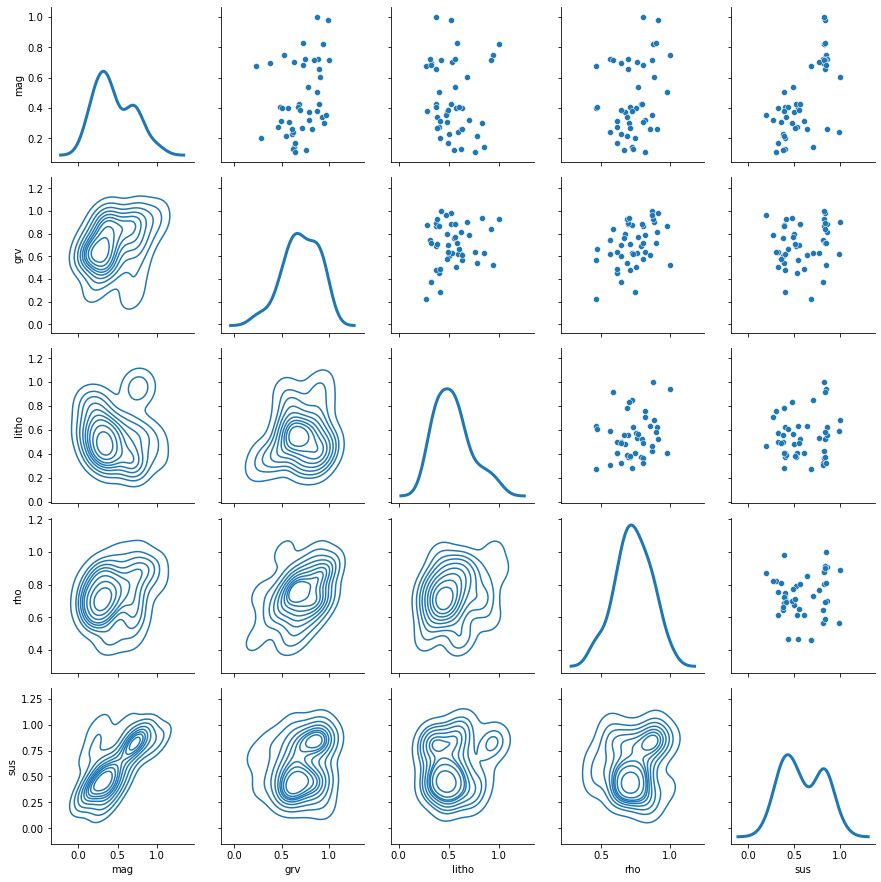

In [6]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

dist_wvt_mag2 = (dist_wvt_mag-np.min(dist_wvt_mag))/(np.max(dist_wvt_mag)-np.min(dist_wvt_mag))
dist_wvt_grv2 = (dist_wvt_grv-np.min(dist_wvt_grv))/(np.max(dist_wvt_grv)-np.min(dist_wvt_grv))
dist_wvt_mod2 = (dist_wvt_mod-np.min(dist_wvt_mod))/(np.max(dist_wvt_mod)-np.min(dist_wvt_mod))
dist_wvt_rho2 = (dist_wvt_rho-np.min(dist_wvt_rho))/(np.max(dist_wvt_rho)-np.min(dist_wvt_rho))
dist_wvt_sus2 = (dist_wvt_sus-np.min(dist_wvt_sus))/(np.max(dist_wvt_sus)-np.min(dist_wvt_sus))

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                    dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_wvt_mag2).embedding_
mdspos_grv = mds.fit(dist_wvt_grv2).embedding_
mdspos_mod = mds.fit(dist_wvt_mod2).embedding_
mdspos_rho = mds.fit(dist_wvt_rho2).embedding_
mdspos_sus = mds.fit(dist_wvt_sus2).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_wvt_mag2[ix], 'grv':dist_wvt_grv2[ix], 'litho':dist_wvt_mod2[ix], 'rho':dist_wvt_rho2[ix], 'sus':dist_wvt_sus2[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")

## Save indicators<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [7]:
with open(picklefilenamewvt, 'wb') as f:
    pickle.dump([dist_wvt_mag,dist_wvt_grv,dist_wvt_mod,dist_wvt_rho,dist_wvt_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)